In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
!git clone https://github.com/ImrulkayeSifat/ML-Assignment.git

fatal: destination path 'ML-Assignment' already exists and is not an empty directory.


In [3]:
data_dir = 'ML-Assignment/CNN_dataset/'
categories = ['HeadCT', 'ChestCT', 'AbdomenCT', 'Hand', 'CXR']
data = []
label = []

In [4]:
for i, category in enumerate(categories):
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB
        image = cv2.resize(image, (32, 32)) # resize to (224, 224)
        data.append(image)
        label.append(i)

In [5]:
# Convert data and label to numpy arrays
data = np.array(data)
label = np.array(label)

In [6]:
# Shuffle the data
data, label = shuffle(data, label, random_state=42)

In [7]:
# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [8]:
# Balance the dataset
class_counts = np.bincount(y_train)
max_count = np.max(class_counts)
for i, count in enumerate(class_counts):
    if count != max_count:
        mask = y_train == i
        X_train = np.concatenate((X_train, X_train[mask]), axis=0)
        y_train = np.concatenate((y_train, y_train[mask]), axis=0)

In [9]:
# Normalize the data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [10]:
# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(categories), activation='softmax')
])

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

Epoch 1/5
1799/1799 [==============================] - 116s 64ms/step - loss: 0.0560 - accuracy: 0.9814 - val_loss: 0.0036 - val_accuracy: 0.9987
Epoch 2/5
1799/1799 [==============================] - 115s 64ms/step - loss: 0.0096 - accuracy: 0.9972 - val_loss: 0.0032 - val_accuracy: 0.9986
Epoch 3/5
1799/1799 [==============================] - 113s 63ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.0073 - val_accuracy: 0.9980
Epoch 4/5
1799/1799 [==============================] - 103s 57ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.0066 - val_accuracy: 0.9985
Epoch 5/5
1799/1799 [==============================] - 104s 58ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0064 - val_accuracy: 0.9985


In [13]:
# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 6s 18ms/step - loss: 0.0055 - accuracy: 0.9987
Test accuracy: 0.9987000226974487


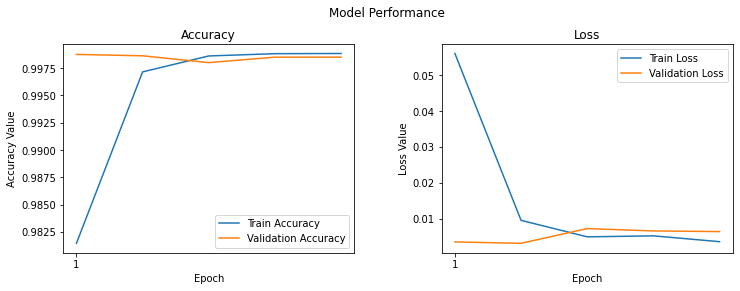

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")